In [156]:
!pip install --upgrade pytube youtube-comment-downloader pandas

In [157]:
!pip install youtube-comment-downloader
!pip install youtube-search-python

In [159]:
# Import library yang dibutuhkan
import pandas as pd
from youtube_comment_downloader import YoutubeCommentDownloader
from pytube import Search  # Menggunakan Pytube untuk pencarian
import itertools

# 1. Masukkan KATA KUNCI yang ingin Anda cari di YouTube
KATA_KUNCI_PENCARIAN = "ulasan Toyota Vios 2023 Indonesia"

# 2. Tentukan berapa video teratas dari hasil pencarian yang ingin di-scrape
JUMLAH_VIDEO_UNTUK_DISCRAPE = 10 # Ambil video teratas

# 3. Batasi jumlah maksimal komentar yang diambil PER VIDEO
MAKSIMAL_KOMENTAR_PER_VIDEO = 200 # Ambil 150 komentar dari setiap video

# 4. Tentukan nama file output untuk menyimpan SEMUA komentar
NAMA_FILE_OUTPUT = 'hasil_scraping_vios_pytube.csv'

# -----------------------------------------------------
# --- PROSES SCRAPING OTOMATIS (REVISI) ---
# -----------------------------------------------------

print(f"Mencari video di YouTube dengan kata kunci: '{KATA_KUNCI_PENCARIAN}'...")

# TAHAP 1: MENCARI VIDEO MENGGUNAKAN PYTUBE
try:
    s = Search(KATA_KUNCI_PENCARIAN)
    list_url_video = []
    # Ambil URL video sebanyak JUMLAH_VIDEO_UNTUK_DISCRAPE
    for i, video in enumerate(s.results):
        if i >= JUMLAH_VIDEO_UNTUK_DISCRAPE:
            break
        list_url_video.append(video.watch_url)
except Exception as e:
    print(f"Gagal melakukan pencarian video. Error: {e}")
    list_url_video = []


if not list_url_video:
    print("Tidak ada video yang ditemukan dengan kata kunci tersebut.")
else:
    print(f"Berhasil menemukan {len(list_url_video)} video. Memulai proses scraping komentar...")

    semua_komentar_total = []
    downloader = YoutubeCommentDownloader()

    # TAHAP 2: SCRAPING KOMENTAR DARI SETIAP VIDEO (Tetap sama)
    for i, url in enumerate(list_url_video):
        print(f"\n({i+1}/{len(list_url_video)}) Scraping dari URL: {url}")
        try:
            komentar_generator = downloader.get_comments_from_url(url, sort_by=1)
            for comment in itertools.islice(komentar_generator, MAKSIMAL_KOMENTAR_PER_VIDEO):
                data_komentar = {
                    'username': comment.get('author'),
                    'waktu': comment.get('time'),
                    'teks_komentar': comment.get('text'),
                    'jumlah_likes': comment.get('votes', 0),
                    'sumber_video': url
                }
                semua_komentar_total.append(data_komentar)
            print(f"  -> Selesai. Berhasil mengambil komentar dari video ini.")
        except Exception as e:
            print(f"  -> Gagal mengambil komentar dari video ini. Error: {e}")
            continue

    # TAHAP 3: MENYIMPAN HASIL GABUNGAN (Tetap sama)
    if semua_komentar_total:
        df_gabungan = pd.DataFrame(semua_komentar_total)
        df_gabungan.to_csv(NAMA_FILE_OUTPUT, index=False)
        print(f"\n✅ PROSES SELESEI! Total {len(df_gabungan)} komentar dari {len(list_url_video)} video telah disimpan ke '{NAMA_FILE_OUTPUT}'")
    else:
        print("\nTidak ada komentar yang berhasil di-scrape.")

Mencari video di YouTube dengan kata kunci: 'ulasan Toyota Vios 2023 Indonesia'...


Berhasil menemukan 10 video. Memulai proses scraping komentar...

(1/10) Scraping dari URL: https://youtube.com/watch?v=HR4ELY1Xm3w
  -> Selesai. Berhasil mengambil komentar dari video ini.

(2/10) Scraping dari URL: https://youtube.com/watch?v=FDU3zV2_n04
  -> Selesai. Berhasil mengambil komentar dari video ini.

(3/10) Scraping dari URL: https://youtube.com/watch?v=YdTPa-zESgM
  -> Selesai. Berhasil mengambil komentar dari video ini.

(4/10) Scraping dari URL: https://youtube.com/watch?v=FhNVPXJW_g8
  -> Selesai. Berhasil mengambil komentar dari video ini.

(5/10) Scraping dari URL: https://youtube.com/watch?v=dCynfd001QM
  -> Selesai. Berhasil mengambil komentar dari video ini.

(6/10) Scraping dari URL: https://youtube.com/watch?v=wLEeNdEK3to
  -> Selesai. Berhasil mengambil komentar dari video ini.

(7/10) Scraping dari URL: https://youtube.com/watch?v=3iXnHIH2HsI
  -> Selesai. Berhasil mengambil komentar dari video ini.

(8/10) Scraping dari URL: https://youtube.com/watch?v=Ip18R

In [160]:
import pandas as pd

# 1. Baca file CSV yang sudah Anda buat sebelumnya
nama_file = 'hasil_scraping_vios_pytube.csv'
df = pd.read_csv(nama_file)

# 2. Terapkan case folding (mengubah ke huruf kecil) pada kolom 'teks_komentar'
#    Kita akan membuat kolom baru bernama 'komentar_bersih' untuk menyimpan hasilnya
#    agar data asli tetap ada jika diperlukan.
df['case_folding'] = df['teks_komentar'].str.lower()

# 3. Tampilkan perbandingan sebelum dan sesudah case folding untuk 5 baris pertama
print("Perbandingan Sebelum dan Sesudah Case Folding:")
print(df[['teks_komentar', 'case_folding']].head())

# 4. (Opsional) Simpan hasilnya ke file CSV baru jika Anda mau
#    File ini akan berisi semua kolom lama ditambah kolom 'komentar_bersih'
df.to_csv('hasil_vios_1_casefolding.csv', index=False)

print("\n✅ Proses case folding selesai.")

Perbandingan Sebelum dan Sesudah Case Folding:
                                       teks_komentar  \
0                         sayang gada manual nya.. 😢   
1  Keren sih di harga Rp300jt-an sudah dapat mobi...   
2                      cakep ya, tp sedikit di jalan   
3                          Empuk,enak buat bawa tamu   
4                      Cek Harga & pajak tahunan nya   

                                        case_folding  
0                         sayang gada manual nya.. 😢  
1  keren sih di harga rp300jt-an sudah dapat mobi...  
2                      cakep ya, tp sedikit di jalan  
3                          empuk,enak buat bawa tamu  
4                      cek harga & pajak tahunan nya  

✅ Proses case folding selesai.


In [161]:
# --- 1. INSTALASI LIBRARY YANG DIBUTUHKAN ---
!pip install Sastrawi nltk wordcloud pandas -q

In [162]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [163]:
# Download NLTK tokenizer jika belum ada
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')

In [164]:
# --- 2. MEMBACA DATA & PERSIAPAN ---
nama_file = '/content/hasil_vios_1_casefolding.csv'
df = pd.read_csv(nama_file)
df.dropna(subset=['teks_komentar'], inplace=True)

In [165]:
# Inisialisasi Stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

In [166]:
# Inisialisasi Stopword Remover
stopword_factory = StopWordRemoverFactory()
more_stopwords = ['sih', 'ya', 'ga', 'gak', 'gk', 'yg', 'nya', 'nih', 'kok', 'deh', 'aja']
base_stopwords = stopword_factory.get_stop_words()
stopword_list = base_stopwords + more_stopwords
if 'tidak' in stopword_list:
    stopword_list.remove('tidak')
stopword_set = set(stopword_list)

# Kamus slang
kamus_slang = {
    "bgt": "banget",
    "jg": "juga",
    "gw": "saya",
    "tp": "tapi",
    "tdk": "tidak",
    "kalo": "kalau",
    "utk": "untuk",
    "dg": "dengan",
    "krn": "karena",
    "klo": "kalau",
    "jdi": "jadi",
    "skrg": "sekarang",
    "kece": "keren",
    "new": "baru",
    "kyk": "kaya",
    "kece": "bagus",
    "good": "bagus",
    "top": "bagus"
}

In [167]:
# --- 3. FUNGSI PREPROCESSING UTAMA (YANG DIPERBAIKI) ---
def preprocess_text_final(text):
    # 1. Case Folding
    text = text.lower()

    # 2. Normalisasi Slang
    words = text.split()
    normalized_words = [kamus_slang.get(word, word) for word in words]
    text = " ".join(normalized_words)

    # --- PERBAIKAN DI BAGIAN CLEANING INI ---
    # 3. Cleaning: Ganti URL, mention, angka, dan tanda baca dengan spasi
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+', ' ', text) # Ganti URL/mention dengan spasi
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)              # Ganti non-huruf (termasuk angka) dengan spasi
    text = re.sub(r'\s+', ' ', text).strip()              # Hapus spasi berlebih
    # --- AKHIR PERBAIKAN ---

    # 4. Stemming
    text = stemmer.stem(text)

    # 5. Tokenizing
    tokens = word_tokenize(text)

    # 6. Stopword Removal
    tokens = [word for word in tokens if word not in stopword_set]

    # 7. Filter Kata Pendek
    tokens = [word for word in tokens if len(word) > 2]

    return tokens

In [168]:
# --- 4. APLIKASIKAN FUNGSI & TAMPILKAN HASIL ---
df['komentar_final'] = df['teks_komentar'].apply(preprocess_text_final)

print("Perbandingan setelah perbaikan:")
display(df[['teks_komentar', 'komentar_final']].head())

Perbandingan setelah perbaikan:


,teks_komentar,komentar_final
0,sayang gada manual nya.. 😢,"[sayang, gada, manual]"
1,Keren sih di harga Rp300jt-an sudah dapat mobi...,"[keren, harga, mobil, sedan]"
2,"cakep ya, tp sedikit di jalan","[cakep, sedikit, jalan]"
3,"Empuk,enak buat bawa tamu","[empuk, enak, buat, bawa, tamu]"
4,Cek Harga & pajak tahunan nya,"[cek, harga, pajak, tahun]"


In [169]:
preprocessing_normalisasi = 'preprocessing_normalisasi_vios.csv'
df.to_csv(preprocessing_normalisasi, index=False)

print(f"{preprocessing_normalisasi}")

preprocessing_normalisasi_vios.csv


/tmp/ipython-input-25562705.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['komentar_final'].fillna('', inplace=True)
/tmp/ipython-input-25562705.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Unigram', data=df_unigrams, palette='coolwarm')


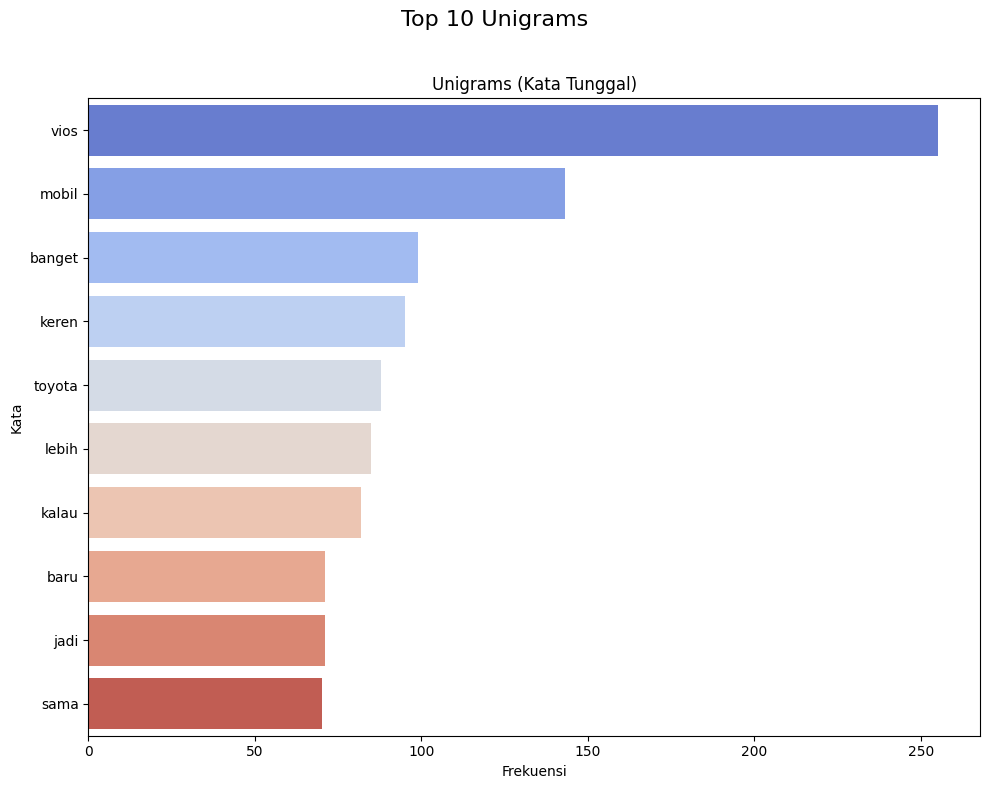

In [170]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Membaca file CSV
    df = pd.read_csv('/content/preprocessing_normalisasi_vios.csv')
    df['komentar_final'].fillna('', inplace=True)

    # Fungsi untuk mendapatkan n-gram teratas (tidak diubah)
    def get_top_ngrams(corpus, n, n_gram_range):
        vectorizer = CountVectorizer(ngram_range=n_gram_range).fit(corpus)
        bag_of_words = vectorizer.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        return words_freq[:n]

    # --- PERUBAHAN DIMULAI DI SINI ---

    # 1. Hanya dapatkan 10 unigram teratas
    top_unigrams = get_top_ngrams(df['komentar_final'], 10, (1, 1))
    df_unigrams = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

    # 2. Buat satu plot saja, bukan subplot
    plt.figure(figsize=(10, 8)) # Ukuran disesuaikan untuk satu plot
    plt.suptitle('Top 10 Unigrams', fontsize=16)

    # 3. Plot Unigrams secara langsung
    sns.barplot(x='Frequency', y='Unigram', data=df_unigrams, palette='coolwarm')

    # Atur judul dan label
    plt.title('Unigrams (Kata Tunggal)')
    plt.xlabel('Frekuensi')
    plt.ylabel('Kata')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

except FileNotFoundError:
    print("File tidak ditemukan.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

/tmp/ipython-input-3065912573.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['komentar_final'].fillna('', inplace=True)
/tmp/ipython-input-3065912573.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette='viridis')


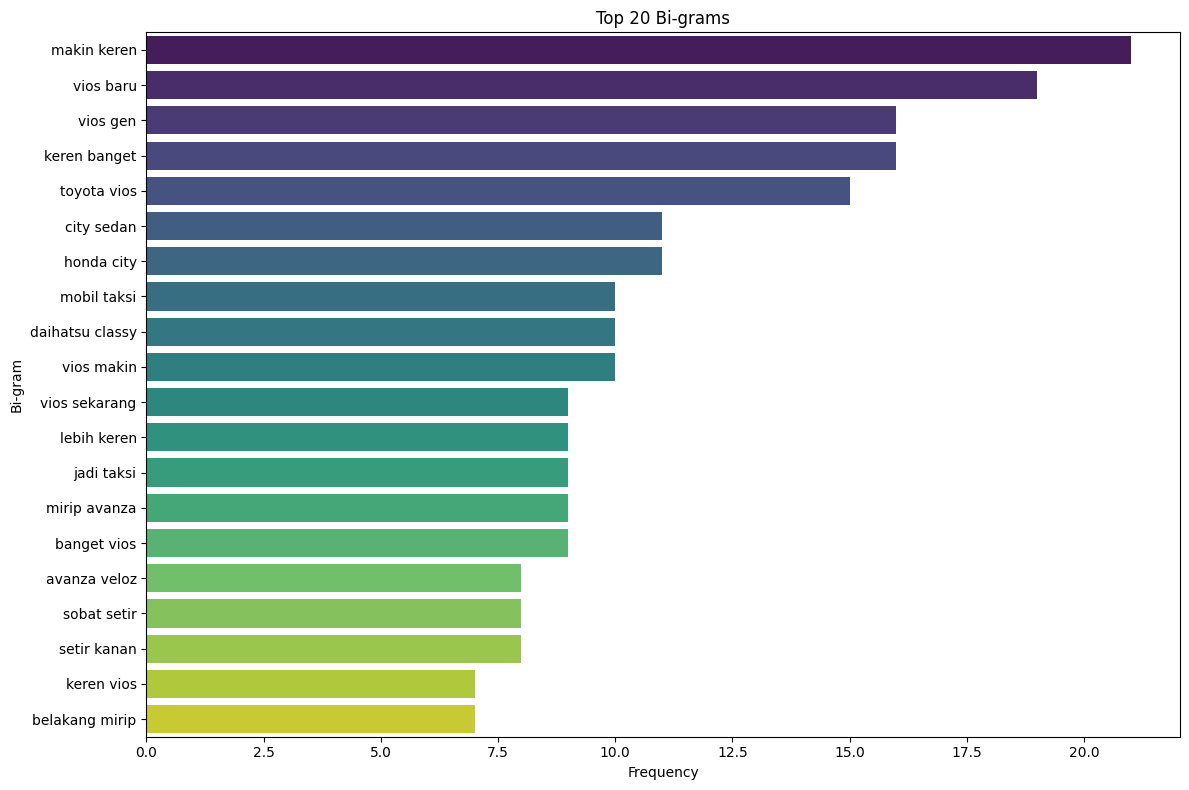

Top 20 Bi-grams:
             Bigram  Frequency
0       makin keren         21
1         vios baru         19
2          vios gen         16
3      keren banget         16
4       toyota vios         15
5        city sedan         11
6        honda city         11
7       mobil taksi         10
8   daihatsu classy         10
9        vios makin         10
10    vios sekarang          9
11      lebih keren          9
12       jadi taksi          9
13     mirip avanza          9
14      banget vios          9
15     avanza veloz          8
16      sobat setir          8
17      setir kanan          8
18       keren vios          7
19   belakang mirip          7


In [171]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('/content/preprocessing_normalisasi_vios.csv')
    df['komentar_final'].fillna('', inplace=True)

    # Inisialisasi CountVectorizer untuk bi-gram
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bigram_matrix = vectorizer.fit_transform(df['komentar_final'])

    # Menjumlahkan frekuensi setiap bi-gram
    sum_words = bigram_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Membuat DataFrame dari 20 bi-gram teratas
    top_bigrams = pd.DataFrame(words_freq[:20], columns=['Bigram', 'Frequency'])

    # Visualisasi
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette='viridis')
    plt.title('Top 20 Bi-grams')
    plt.xlabel('Frequency')
    plt.ylabel('Bi-gram')
    plt.tight_layout()
    plt.show()

    print("Top 20 Bi-grams:")
    print(top_bigrams)

except FileNotFoundError:
    print("File 'hasil_normalisasi_youtube_cpmk2.csv' tidak ditemukan. Pastikan file berada di direktori yang sama.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

/tmp/ipython-input-2184492617.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['komentar_final'].fillna('', inplace=True)
/tmp/ipython-input-2184492617.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=top_trigrams, palette='plasma')


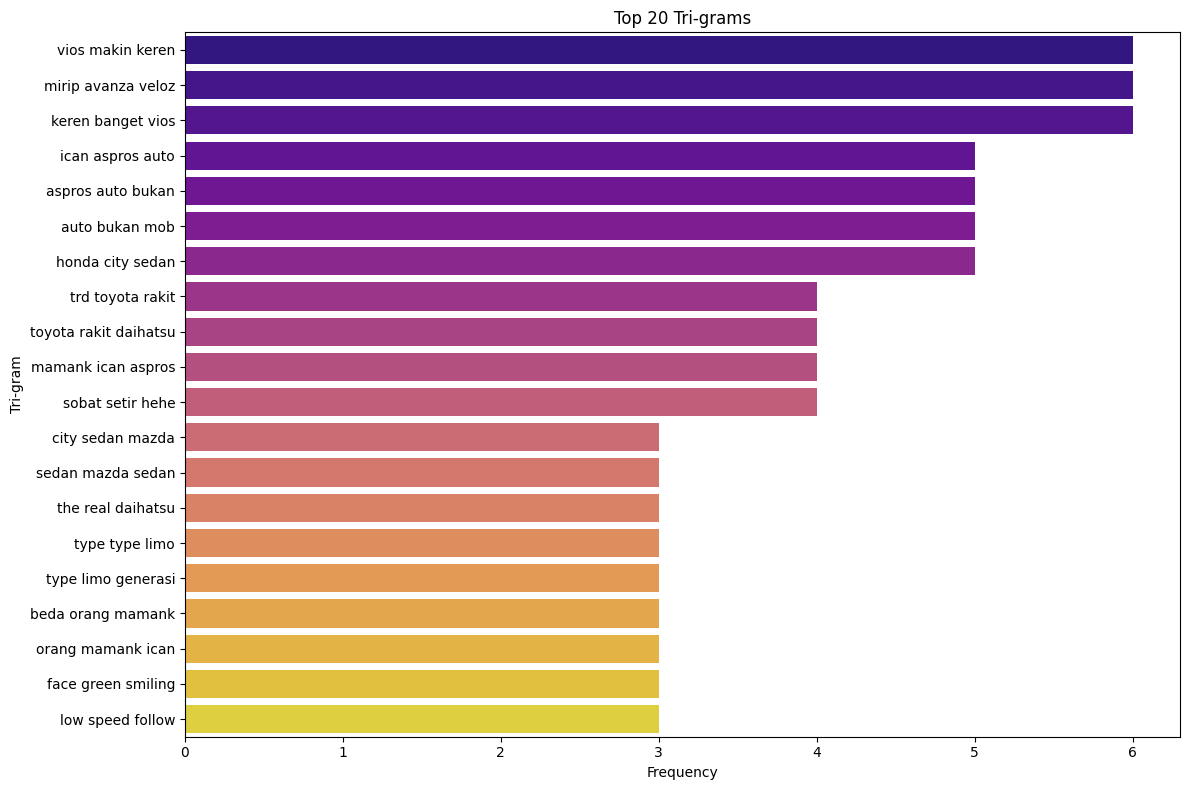

Top 20 Tri-grams:
                  Trigram  Frequency
0        vios makin keren          6
1      mirip avanza veloz          6
2       keren banget vios          6
3        ican aspros auto          5
4       aspros auto bukan          5
5          auto bukan mob          5
6        honda city sedan          5
7        trd toyota rakit          4
8   toyota rakit daihatsu          4
9      mamank ican aspros          4
10       sobat setir hehe          4
11       city sedan mazda          3
12      sedan mazda sedan          3
13      the real daihatsu          3
14         type type limo          3
15     type limo generasi          3
16      beda orang mamank          3
17      orang mamank ican          3
18     face green smiling          3
19       low speed follow          3


In [172]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('/content/preprocessing_normalisasi_vios.csv')
    df['komentar_final'].fillna('', inplace=True)

    # Inisialisasi CountVectorizer untuk tri-gram
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    trigram_matrix = vectorizer.fit_transform(df['komentar_final'])

    # Menjumlahkan frekuensi setiap tri-gram
    sum_words = trigram_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Membuat DataFrame dari 20 tri-gram teratas
    top_trigrams = pd.DataFrame(words_freq[:20], columns=['Trigram', 'Frequency'])

    # Visualisasi
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequency', y='Trigram', data=top_trigrams, palette='plasma')
    plt.title('Top 20 Tri-grams')
    plt.xlabel('Frequency')
    plt.ylabel('Tri-gram')
    plt.tight_layout()
    plt.show()

    print("Top 20 Tri-grams:")
    print(top_trigrams)

except FileNotFoundError:
    print("File 'hasil_normalisasi_youtube_cpmk2.csv' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

/tmp/ipython-input-3491006619.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['komentar_final'].fillna('', inplace=True)


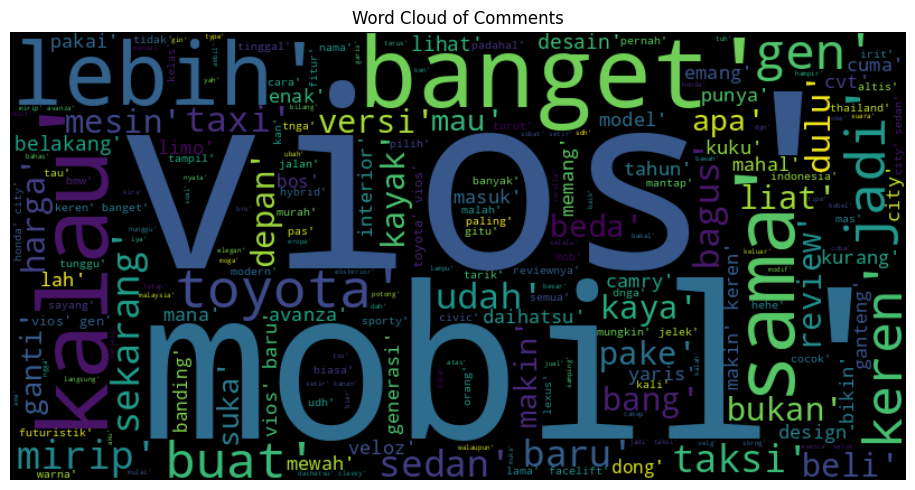

In [173]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('/content/preprocessing_normalisasi_vios.csv')
    df['komentar_final'].fillna('', inplace=True)

    # Menggabungkan semua komentar menjadi satu teks panjang
    all_text = ' '.join(df['komentar_final'])

    # Membuat word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

    # Menampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Comments')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("File tidak ditemukan.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")